# Kelompok 2

Anggota :
1. Ahmeid Aqeil
2. Rahmat Afriyanto

In [ ]:
import yfinance as yf
import pandas as pd

# Tentukan kode saham untuk NVIDIA Corporation (NVDA)
kode_saham = "NVDA"

# Tentukan rentang waktu
start_date = "2019-01-01"
end_date = "2025-04-25"

# Ambil data menggunakan yfinance
df = yf.download(kode_saham, start=start_date, end=end_date)
df.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2019-01-02,3.377779,3.433819,3.224785,3.239415,508752000
2019-01-03,3.173705,3.351496,3.166266,3.317524,705552000
2019-01-04,3.377035,3.415222,3.216106,3.246853,585620000
2019-01-07,3.555818,3.592765,3.382986,3.434315,709160000
2019-01-08,3.467294,3.639630,3.394640,3.637398,786016000


In [ ]:
# Import data
import pandas as pd


df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
df = df.reset_index()
df.head()

,Date,Close,High,Low,Open,Volume
0,2019-01-02,3.377779,3.433819,3.224785,3.239415,508752000
1,2019-01-03,3.173705,3.351496,3.166266,3.317524,705552000
2,2019-01-04,3.377035,3.415222,3.216106,3.246853,585620000
3,2019-01-07,3.555818,3.592765,3.382986,3.434315,709160000
4,2019-01-08,3.467294,3.639630,3.394640,3.637398,786016000


In [ ]:
# Mengambil kolom Date dan Close
data = df[['Date', 'Close']]
data.tail()

,Date,Close
1582,2025-04-17,101.489998
1583,2025-04-21,96.910004
1584,2025-04-22,98.889999
1585,2025-04-23,102.709999
1586,2025-04-24,106.430000


In [ ]:
# Melihat informasi pada data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1587 entries, 0 to 1586
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1587 non-null   datetime64[ns]
 1   Close   1587 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 24.9 KB


In [ ]:
# Melihat data yang kosong
data.isna().sum()

,0
Date,0
Close,0


In [ ]:
# Melihat deskripsi data
data.describe()

,Date,Close
count,1587,1587.000000
mean,2022-02-24 21:53:52.514177536,37.073148
min,2019-01-02 00:00:00,3.173705
25%,2020-07-29 12:00:00,10.528405
50%,2022-02-24 00:00:00,18.690382
75%,2023-09-23 12:00:00,45.474922
max,2025-04-24 00:00:00,149.416245
std,NaN,41.089026


In [ ]:
# Import the libraries
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Bidirectional, Dropout, Dense, Input
from keras.layers import GRU

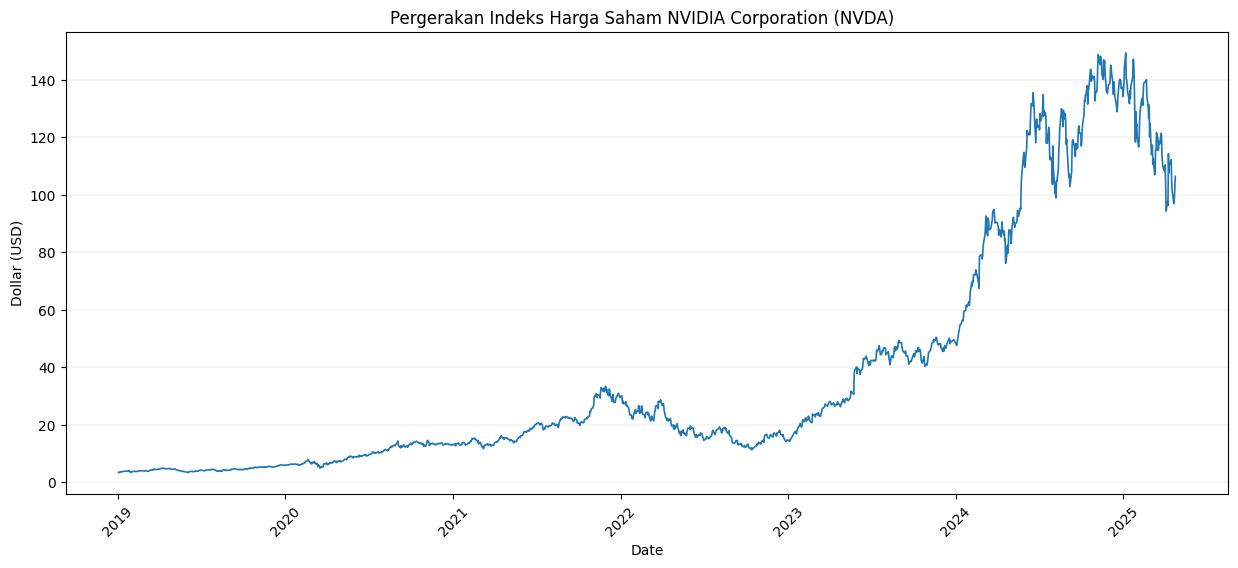

In [ ]:
# Visualisasi data
import matplotlib.pyplot as plt
plt.style.use('default')

plt.figure(figsize=(15,6))
plt.title('Pergerakan Indeks Harga Saham NVIDIA Corporation (NVDA)  ')
plt.plot(data['Date'], data['Close'], linewidth=1.2)
plt.xlabel('Date')
plt.ylabel('Dollar (USD)')
plt.xticks(rotation=45)
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

In [ ]:
# Melakukan normalisasi data
sc = MinMaxScaler(feature_range=(0, 1))
data_sc = sc.fit_transform(data[['Close']].values)
data_sc

array([[0.00139545],
       [0.        ],
       [0.00139037],
       ...,
       [0.65450378],
       [0.68062477],
       [0.70606197]])

In [ ]:
# norm = pd.DataFrame(data_sc)
# norm.head()

In [ ]:
# norm.to_excel('Hasil_Normalisasi.xlsx')

In [ ]:
# Pembagian data (80% training, 10% testing, 10% validasi)
train_len = int(len(data_sc) * 0.8)
test_len = int(len(data_sc) * 0.10)
val_len = len(data_sc) - train_len - test_len

In [ ]:
# Menampilkan jumlah data
print(f'Jumlah data keseluruhan: {len(data_sc)}')
print(f'Jumlah data training: {train_len}')
print(f'Jumlah data validasi: {val_len}')
print(f'Jumlah data testing:{test_len}')

Jumlah data keseluruhan: 1587
Jumlah data training: 1269
Jumlah data validasi: 160
Jumlah data testing:158


In [ ]:
# Membuat Windowing pada data Training
train_data = data_sc[0:train_len  , : ]
x_train=[]
y_train = []
for i in range(30, len(train_data)):
    x_train.append(train_data[i-30:i,0])
    y_train.append(train_data[i,0])

In [ ]:
# Mengubah tipe data list menjadi NumPy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
# Ubah bentuk data menjadi bentuk yang diterima oleh GRU
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [ ]:
# Membuat Windowing pada data Validation
val_data = data_sc[train_len - 30:(train_len + val_len) , : ]
x_val = []
y_val = []
for i in range(30,len(val_data)):
    x_val.append(val_data[i-30:i,0])
    y_val.append(val_data[i,0])

In [ ]:
# Mengubah tipe data list menjadi NumPy array
x_val, y_val = np.array(x_val), np.array(y_val)

In [ ]:
# Ubah bentuk data menjadi bentuk yang diterima oleh GRU
x_val = np.reshape(x_val, (x_val.shape[0],x_val.shape[1],1))

##GRU

In [ ]:
# Membangun model GRU
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout, Dense, Input
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
model_gru = Sequential([
Input(shape=(x_train.shape[1], 1)),
GRU(100, return_sequences=True),
Dropout(0.2),
GRU(100, return_sequences=False),
Dropout(0.2),
Dense(1)
])

In [ ]:
# Path GRU model checkpoint
checkpoint_path_gru = 'model_checkpoints/weights_gru_model.weights.h5'
checkpoint_gru = ModelCheckpoint(
    filepath=checkpoint_path_gru,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    save_weights_only=True,
    verbose=1
)

In [ ]:
# Early Stopping
early_stopping = EarlyStopping(
monitor="val_loss",
patience=5,
min_delta=0.0001,
verbose=1,
restore_best_weights=True
)

In [ ]:
# Compile model GRU (pastikan variabel op terdefinisi, atau ganti langsung dengan 'adam')
model_gru.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Training model GRU
history_gru = model_gru.fit(
x_train, y_train,
batch_size=8,
epochs=100,
validation_data=(x_val, y_val),
callbacks=[checkpoint_gru, early_stopping]
)

Epoch 1/100
151/155 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0021
Epoch 1: val_loss improved from inf to 0.00148, saving model to model_checkpoints/weights_gru_model.weights.h5
155/155 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.0021 - val_loss: 0.0015
Epoch 2/100
148/155 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.4438e-04
Epoch 2: val_loss improved from 0.00148 to 0.00108, saving model to model_checkpoints/weights_gru_model.weights.h5
155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2.4210e-04 - val_loss: 0.0011
Epoch 3/100
148/155 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.7772e-04
Epoch 3: val_loss did not improve from 0.00108
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.7632e-04 - val_loss: 0.0022
Epoch 4/100
151/155 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.8446e-04
Epoch 4: val_loss did not improve from 0.00108
155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1.8413e-04 - val_loss: 0.0021
Epoch 5/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.5611e-04
Epoch 5: v

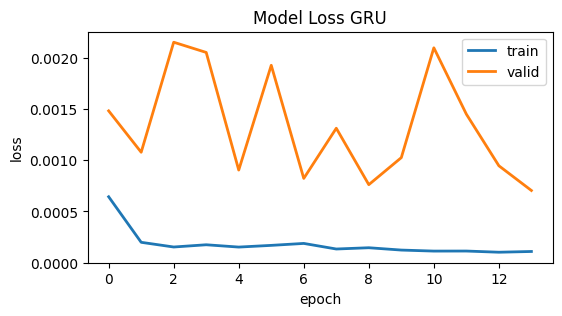

In [ ]:
# Menampilkan plot nilai loss
plt.figure(figsize=(6,3))
plt.plot(history_gru.history['loss'], linewidth=2)
plt.plot(history_gru.history['val_loss'], linewidth=2)
plt.title('Model Loss GRU')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'])
plt.show()

In [ ]:
# Membuat Windowing pada data testing
test_data = data_sc[(-test_len - 30): , : ]
#Create the x_test and y_test data sets
x_test = []
y_test = data[['Close']].iloc[-test_len : , : ].values
for i in range(30,len(test_data)):
    x_test.append(test_data[i-30:i,0])

In [ ]:
# Mengubah tipe data list menjadi NumPy array
x_test = np.array(x_test)

In [ ]:
# Ubah bentuk data menjadi bentuk yang diterima oleh GRU
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [ ]:
# Load bobot model GRU terbaik
model_gru.load_weights("/content/model_checkpoints/weights_gru_model.weights.h5")

In [ ]:
# Melakukan prediksi
y_pred_gru = model_gru.predict(x_test)
y_pred_gru = np.ceil(sc.inverse_transform(y_pred_gru))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [ ]:
# Evaluasi GRU
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

mse_gru = round(mean_squared_error(y_test, y_pred_gru), 2)
rmse_gru = round(np.sqrt(np.mean(y_test - y_pred_gru)**2), 2)
mae_gru = round(mean_absolute_error(y_test, y_pred_gru), 2)
mape_gru = round(mean_absolute_percentage_error(y_test, y_pred_gru)*100, 2)
print("\n Evaluasi GRU Model:")
print(f'MSE : {mse_gru}')
print(f'RMSE : {rmse_gru} ')
print(f'MAE : {mae_gru}')
print(f'MAPE : {mape_gru} ')



 Evaluasi GRU Model:
MSE : 23.53
RMSE : 0.18 
MAE : 3.58
MAPE : 2.88 


In [ ]:
# dataframe hasil prediksi GRU
data_pred_gru = data[-test_len:].copy()
data_pred_gru['Prediction_GRU'] = y_pred_gru

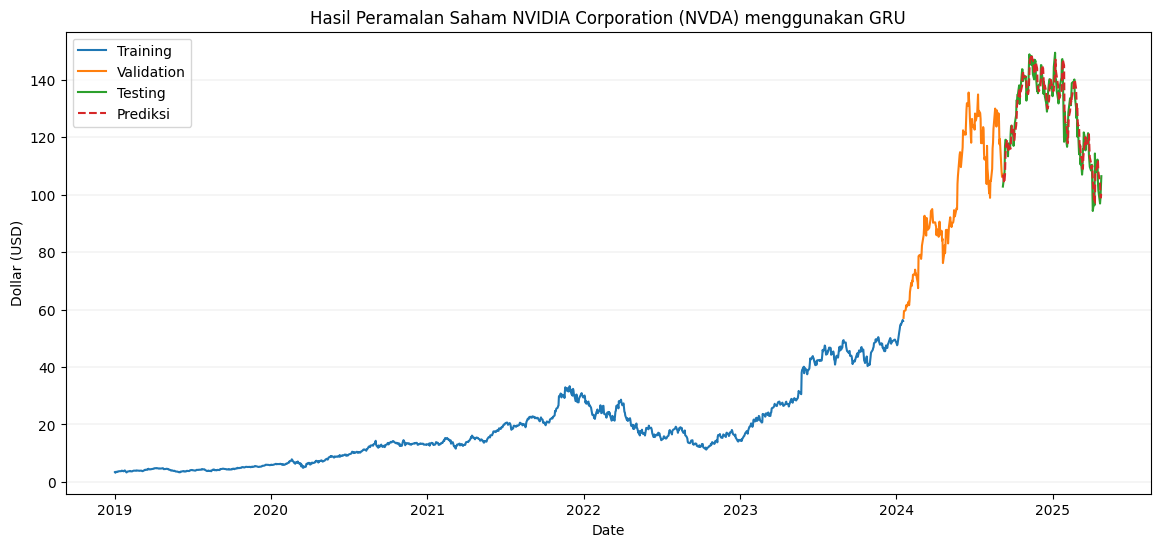

In [ ]:
# Visualisasi Hasil Prediksi GRU
train = data[:train_len]
valid = data[train_len:(train_len + val_len)]
plt.figure(figsize=(14,6))
plt.title('Hasil Peramalan Saham NVIDIA Corporation (NVDA) menggunakan GRU')
plt.plot(train['Date'], train['Close'], label='Training')
plt.plot(valid['Date'], valid['Close'], label='Validation')
plt.plot(data_pred_gru['Date'], data_pred_gru['Close'], label='Testing')
plt.plot(data_pred_gru['Date'], data_pred_gru['Prediction_GRU'], label='Prediksi',linestyle='--')
plt.xlabel('Date')
plt.ylabel('Dollar (USD)')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

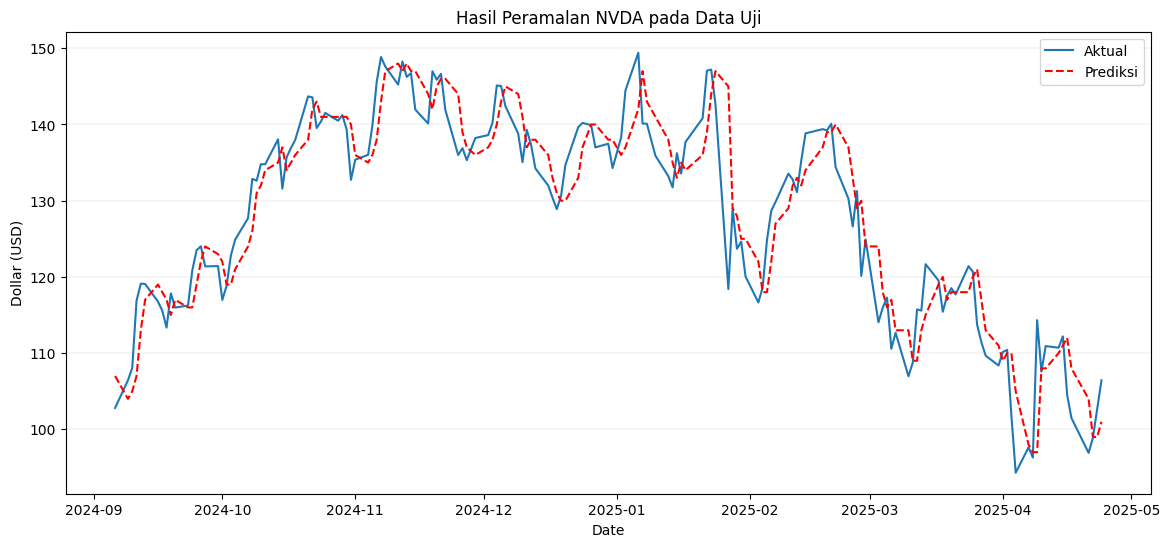

In [ ]:
# Visualisasi Prediksi
plt.figure(figsize=(14,6))
plt.title('Hasil Peramalan NVDA pada Data Uji')
plt.xlabel('Date')
plt.ylabel('Dollar (USD)')
plt.plot(data_pred_gru['Date'], data_pred_gru['Close'], label='Aktual')
plt.plot(data_pred_gru['Date'], data_pred_gru['Prediction_GRU'], label='Prediksi', color='red', linestyle='--')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

In [ ]:
# Ambil 30 hari terakhir sebagai input awal
last_30_gru = data_sc[-30:]
input_pred_gru = last_30_gru.reshape(1, 30, 1)
future_preds_gru = []
for _ in range(30):
    next_pred_gru = model_gru.predict(input_pred_gru, verbose=0)[0][0]
    future_preds_gru.append(next_pred_gru)
# Perbarui jendela input
next_input_gru = np.append(input_pred_gru[0, 1:, 0], next_pred_gru)
input_pred_gru = next_input_gru.reshape(1, 30, 1)

In [ ]:
# Invers transformasi skala
future_preds_inv_gru = sc.inverse_transform(np.array(future_preds_gru).reshape(-1, 1))
future_preds_inv_gru = np.ceil(future_preds_inv_gru)

In [ ]:
# Buat tanggal prediksi (hanya hari kerja)
from datetime import timedelta
last_date_gru = pd.to_datetime(data['Date'].iloc[-1])
future_dates_gru = []
curr_date_gru = last_date_gru + timedelta(days=1)

while len(future_dates_gru) < 30:
    if curr_date_gru.weekday() < 5:  # Hanya hari kerja
        future_dates_gru.append(curr_date_gru)
    curr_date_gru += timedelta(days=1)

In [ ]:
# Buat DataFrame hasil prediksi GRU
pred_30_gru_df = pd.DataFrame({
'Date': future_dates_gru,
'Prediction_GRU': future_preds_inv_gru.flatten()
})


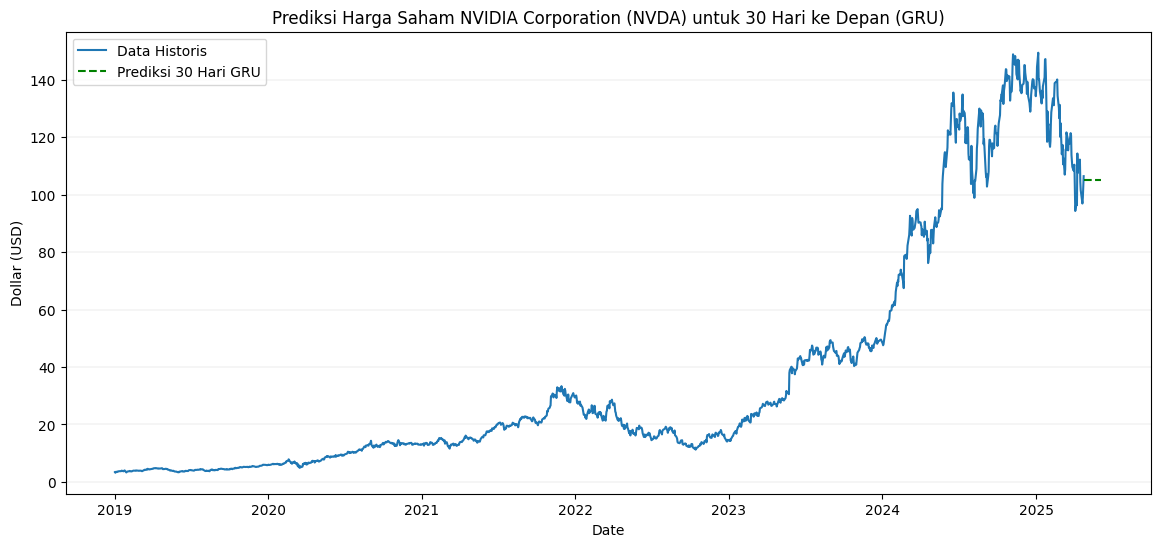

In [ ]:
# Visualisasi hasil prediksi 30 hari ke depan dengan GRU
plt.figure(figsize=(14,6))
plt.title('Prediksi Harga Saham NVIDIA Corporation (NVDA) untuk 30 Hari ke Depan (GRU)')
plt.plot(data['Date'], data['Close'], label='Data Historis')
plt.plot(pred_30_gru_df['Date'], pred_30_gru_df['Prediction_GRU'],label='Prediksi 30 Hari GRU', linestyle='--', color='green')
plt.xlabel('Date')
plt.ylabel('Dollar (USD)')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

##BI-GRU

In [ ]:
# Membangun model Bi-GRU
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, GRU, Dropout, Dense, Input
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
model_bi_gru = Sequential([
Input(shape=(x_train.shape[1], 1)),
Bidirectional(GRU(100, return_sequences=True)),
Dropout(0.2),
Bidirectional(GRU(100, return_sequences=False)),
Dropout(0.2),
Dense(1)
])

In [ ]:
# Path Bi-GRU model checkpoint
checkpoint_path_bi_gru = 'model_checkpoints/weights_bi_gru_model.weights.h5'
checkpoint_bi_gru = ModelCheckpoint(
    filepath=checkpoint_path_bi_gru,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    save_weights_only=True,
    verbose=1
)

In [ ]:
# Early Stopping
early_stopping = EarlyStopping(
monitor="val_loss",
patience=5,
min_delta=0.0001,
verbose=1,
restore_best_weights=True
)

In [ ]:
# Compile model Bi-GRU (pastikan variabel op terdefinisi, atau ganti langsung dengan 'adam')
model_bi_gru.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Training model Bi-GRU
history_bi_gru = model_bi_gru.fit(
x_train, y_train,
batch_size=8,
epochs=100,
validation_data=(x_val, y_val),
callbacks=[checkpoint_bi_gru, early_stopping]
)

Epoch 1/100
154/155 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.9302e-04
Epoch 1: val_loss improved from inf to 0.00229, saving model to model_checkpoints/weights_bi_gru_model.weights.h5
155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1.9297e-04 - val_loss: 0.0023
Epoch 2/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.4054e-04
Epoch 2: val_loss did not improve from 0.00229
155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1.4054e-04 - val_loss: 0.0030
Epoch 3/100
151/155 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.5623e-04
Epoch 3: val_loss improved from 0.00229 to 0.00105, saving model to model_checkpoints/weights_bi_gru_model.weights.h5
155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1.5713e-04 - val_loss: 0.0011
Epoch 4/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.3429e-04
Epoch 4: val_loss improved from 0.00105 to 0.00081, saving model to model_checkpoints/weights_bi_gru_model.weights.h5
155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 1.3431e-04 - val_loss

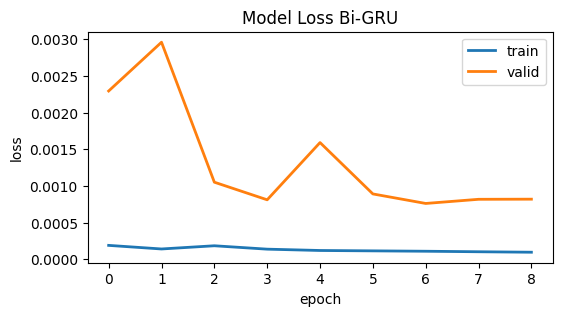

In [ ]:
# Menampilkan plot nilai loss
plt.figure(figsize=(6,3))
plt.plot(history_bi_gru.history['loss'], linewidth=2)
plt.plot(history_bi_gru.history['val_loss'], linewidth=2)
plt.title('Model Loss Bi-GRU')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'])
plt.show()

In [ ]:
# Membuat Windowing pada data testing
test_data = data_sc[(-test_len - 30): , : ]
#Create the x_test and y_test data sets
x_test = []
y_test = data[['Close']].iloc[-test_len : , : ].values
for i in range(30,len(test_data)):
    x_test.append(test_data[i-30:i,0])

In [ ]:
# Mengubah tipe data list menjadi NumPy array
x_test = np.array(x_test)

In [ ]:
# Ubah bentuk data menjadi bentuk yang diterima oleh GRU
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [ ]:
# Load bobot model bi-GRU terbaik
model_bi_gru.load_weights("/content/model_checkpoints/weights_bi_gru_model.weights.h5")

In [ ]:
# Melakukan prediksi
y_pred_bi_gru = model_bi_gru.predict(x_test)
y_pred_bi_gru = np.ceil(sc.inverse_transform(y_pred_bi_gru))

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step


In [ ]:
# Evaluasi Bi-GRU
mse_bi_gru = round(mean_squared_error(y_test, y_pred_bi_gru), 2)
rmse_bi_gru = round(np.sqrt(np.mean(y_test - y_pred_bi_gru)**2), 2)
mae_bi_gru = round(mean_absolute_error(y_test, y_pred_bi_gru), 2)
mape_bi_gru = round(mean_absolute_percentage_error(y_test, y_pred_bi_gru)*100, 2)
print("\n Evaluasi Bi-GRU Model:")
print(f'MSE : {mse_bi_gru}')
print(f'RMSE : {rmse_bi_gru} ')
print(f'MAE : {mae_bi_gru}')
print(f'MAPE : {mape_bi_gru} %')



 Evaluasi Bi-GRU Model:
MSE : 25.77
RMSE : 1.48 
MAE : 3.73
MAPE : 3.03 %


In [ ]:
# dataframe hasil prediksi BI-GRU
data_pred_bi_gru = data[-test_len:].copy()
data_pred_bi_gru['Prediction_Bi_GRU'] = y_pred_bi_gru

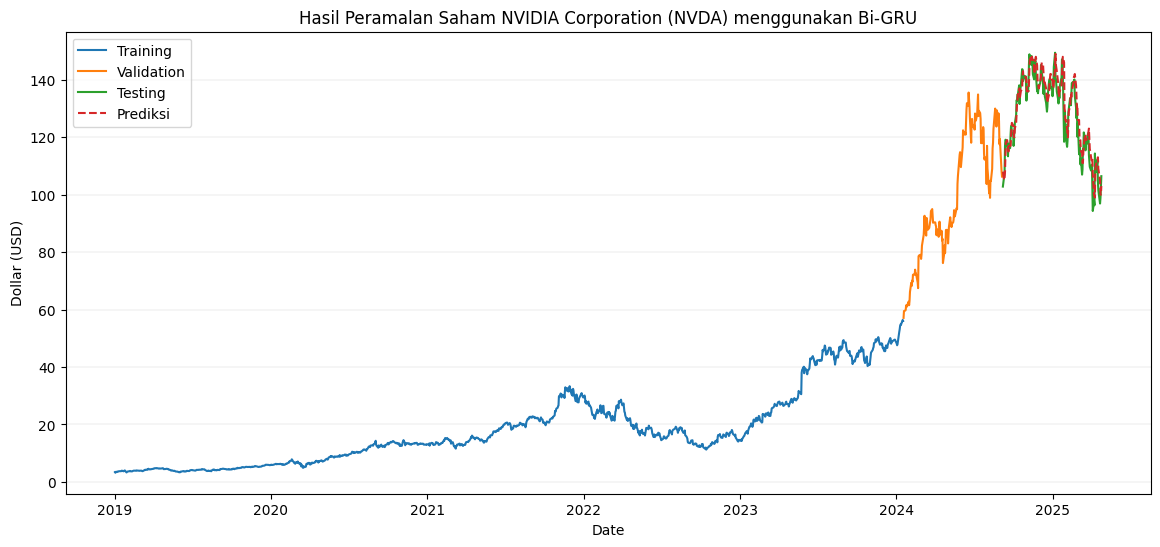

In [ ]:
# Visualisasi Hasil Prediksi BI-GRU
train = data[:train_len]
valid = data[train_len:(train_len + val_len)]
plt.figure(figsize=(14,6))
plt.title('Hasil Peramalan Saham NVIDIA Corporation (NVDA) menggunakan Bi-GRU')
plt.plot(train['Date'], train['Close'], label='Training')
plt.plot(valid['Date'], valid['Close'], label='Validation')
plt.plot(data_pred_bi_gru['Date'], data_pred_bi_gru['Close'], label='Testing')
plt.plot(data_pred_bi_gru['Date'], data_pred_bi_gru['Prediction_Bi_GRU'], label='Prediksi',linestyle='--')
plt.xlabel('Date')
plt.ylabel('Dollar (USD)')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

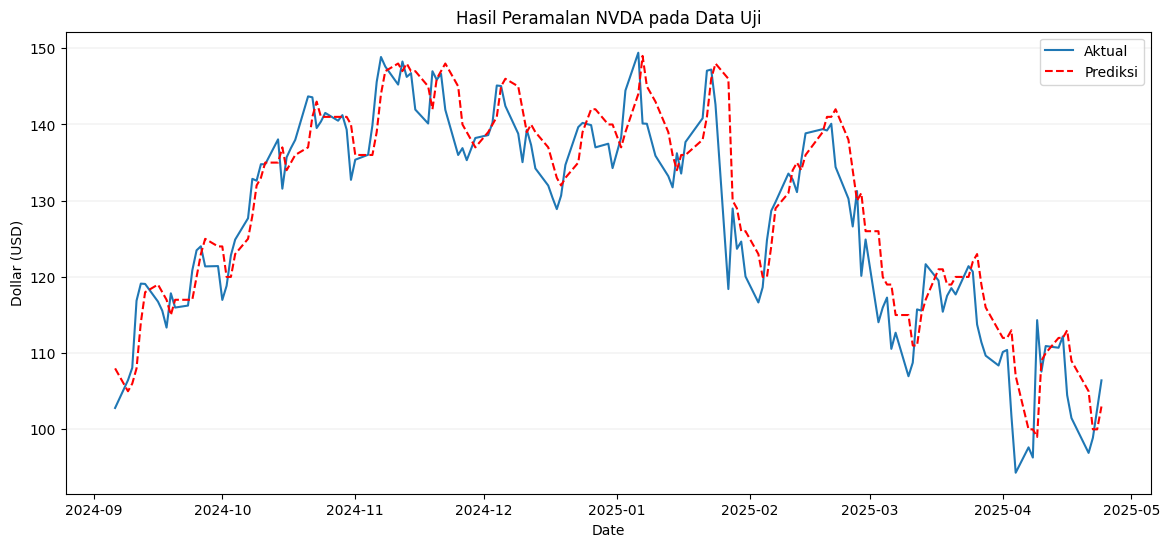

In [ ]:
# Visualisasi Prediksi
plt.figure(figsize=(14,6))
plt.title('Hasil Peramalan NVDA pada Data Uji')
plt.xlabel('Date')
plt.ylabel('Dollar (USD)')
plt.plot(data_pred_bi_gru['Date'], data_pred_bi_gru['Close'], label='Aktual')
plt.plot(data_pred_bi_gru['Date'], data_pred_bi_gru['Prediction_Bi_GRU'], label='Prediksi', color='red', linestyle='--')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

In [ ]:
# Ambil 30 hari terakhir sebagai input awal
last_30_bi_gru = data_sc[-30:]
input_pred_bi_gru = last_30_gru.reshape(1, 30, 1)
future_preds_bi_gru = []
for _ in range(30):
    next_pred_bi_gru = model_bi_gru.predict(input_pred_bi_gru, verbose=0)[0][0]
    future_preds_bi_gru.append(next_pred_bi_gru)
# Perbarui jendela input
next_input_bi_gru = np.append(input_pred_bi_gru[0, 1:, 0], next_pred_bi_gru)
input_pred_bi_gru = next_input_bi_gru.reshape(1, 30, 1)

In [ ]:
# Invers transformasi skala
future_preds_inv_bi_gru = sc.inverse_transform(np.array(future_preds_bi_gru).reshape(-1, 1))
future_preds_inv_bi_gru = np.ceil(future_preds_inv_bi_gru)

In [ ]:
# Buat tanggal prediksi (hanya hari kerja)
last_date_bi_gru = pd.to_datetime(data['Date'].iloc[-1])
future_dates_bi_gru = []
curr_date_bi_gru = last_date_bi_gru + timedelta(days=1)

while len(future_dates_bi_gru) < 30:
    if curr_date_bi_gru.weekday() < 5:  # Hanya hari kerja
        future_dates_bi_gru.append(curr_date_bi_gru)
    curr_date_bi_gru += timedelta(days=1)

In [ ]:
# Buat DataFrame hasil prediksi GRU
pred_30_bi_gru_df = pd.DataFrame({
'Date': future_dates_bi_gru,
'Prediction_Bi_GRU': future_preds_inv_bi_gru.flatten()
})


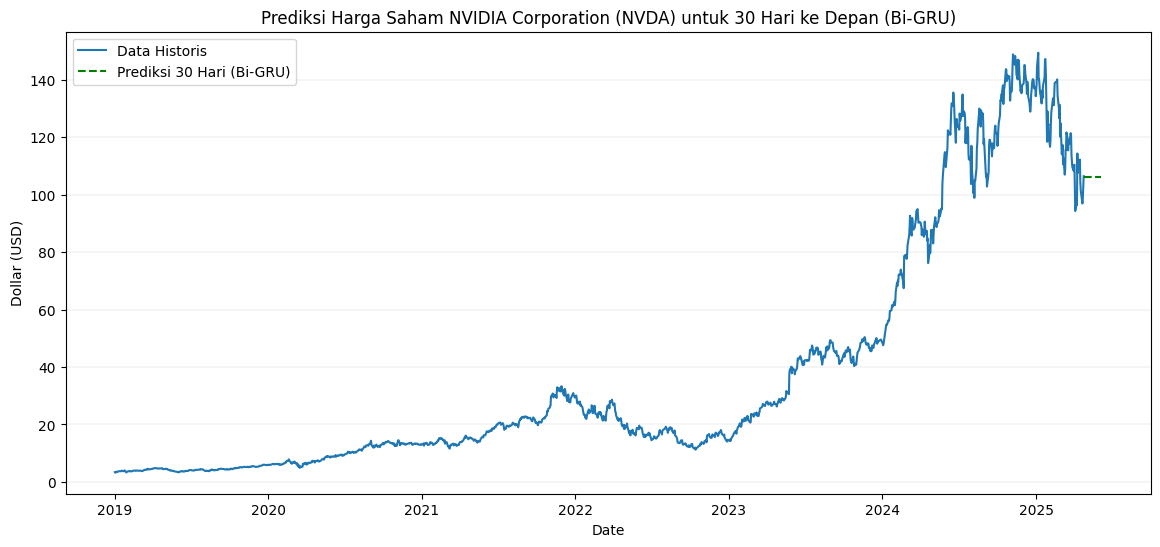

In [ ]:
# Visualisasi hasil prediksi 30 hari ke depan dengan Bi-GRU
plt.figure(figsize=(14,6))
plt.title('Prediksi Harga Saham NVIDIA Corporation (NVDA) untuk 30 Hari ke Depan (Bi-GRU)')
plt.plot(data['Date'], data['Close'], label='Data Historis')
plt.plot(pred_30_bi_gru_df['Date'], pred_30_bi_gru_df['Prediction_Bi_GRU'],label='Prediksi 30 Hari (Bi-GRU)', linestyle='--', color='green')
plt.xlabel('Date')
plt.ylabel('Dollar (USD)')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

## Stacked GRU

In [ ]:
# Membangun model Stacked GRU
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout, Dense, Input
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
model_stack_gru = Sequential([
Input(shape=(x_train.shape[1], 1)),
GRU(100, return_sequences=True),
GRU(100, return_sequences=True),
GRU(32),
Dense(1)
])

In [ ]:
# Path GRU model checkpoint
checkpoint_path_stack_gru = 'model_checkpoints/weights_stack_gru_model.weights.h5'
checkpoint_stack_gru = ModelCheckpoint(
    filepath=checkpoint_path_stack_gru,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    save_weights_only=True,
    verbose=1
)

In [ ]:
# Early Stopping
early_stopping = EarlyStopping(
monitor="val_loss",
patience=5,
min_delta=0.0001,
verbose=1,
restore_best_weights=True
)

In [ ]:
# Compile model GRU (pastikan variabel op terdefinisi, atau ganti langsung dengan 'adam')
model_stack_gru.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Training model GRU
history_stack_gru = model_stack_gru.fit(
x_train, y_train,
batch_size=8,
epochs=100,
validation_data=(x_val, y_val),
callbacks=[checkpoint_stack_gru, early_stopping]
)

Epoch 1/100
150/155 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.5042e-04
Epoch 1: val_loss improved from inf to 0.00132, saving model to model_checkpoints/weights_stack_gru_model.weights.h5
155/155 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 7.3170e-04 - val_loss: 0.0013
Epoch 2/100
154/155 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.4018e-04
Epoch 2: val_loss did not improve from 0.00132
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.3990e-04 - val_loss: 0.0016
Epoch 3/100
153/155 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.8937e-05
Epoch 3: val_loss improved from 0.00132 to 0.00096, saving model to model_checkpoints/weights_stack_gru_model.weights.h5
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 6.8819e-05 - val_loss: 9.6139e-04
Epoch 4/100
154/155 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.0983e-05
Epoch 4: val_loss improved from 0.00096 to 0.00088, saving model to model_checkpoints/weights_stack_gru_model.weights.h5
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 7.1044e-05 - va

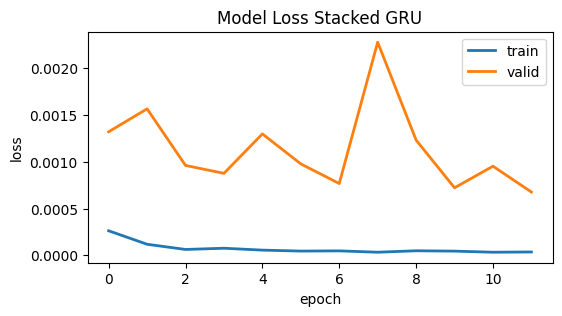

In [ ]:
# Menampilkan plot nilai loss
plt.figure(figsize=(6,3))
plt.plot(history_stack_gru.history['loss'], linewidth=2)
plt.plot(history_stack_gru.history['val_loss'], linewidth=2)
plt.title('Model Loss Stacked GRU')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'])
plt.show()

In [ ]:
# Membuat Windowing pada data testing
test_data = data_sc[(-test_len - 30): , : ]
#Create the x_test and y_test data sets
x_test = []
y_test = data[['Close']].iloc[-test_len : , : ].values
for i in range(30,len(test_data)):
    x_test.append(test_data[i-30:i,0])

In [ ]:
# Mengubah tipe data list menjadi NumPy array
x_test = np.array(x_test)

In [ ]:
# Ubah bentuk data menjadi bentuk yang diterima oleh GRU
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [ ]:
# Load bobot model GRU terbaik
model_stack_gru.load_weights("/content/model_checkpoints/weights_stack_gru_model.weights.h5")

In [ ]:
# Melakukan prediksi
y_pred_stack_gru = model_stack_gru.predict(x_test)
y_pred_stack_gru = np.ceil(sc.inverse_transform(y_pred_stack_gru))

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step


In [ ]:
# Evaluasi Stack GRU
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

mse_stack_gru = round(mean_squared_error(y_test, y_pred_stack_gru), 2)
rmse_stack_gru = round(np.sqrt(np.mean(y_test - y_pred_stack_gru)**2), 2)
mae_stack_gru = round(mean_absolute_error(y_test, y_pred_stack_gru), 2)
mape_stack_gru = round(mean_absolute_percentage_error(y_test, y_pred_stack_gru)*100, 2)
print("\n Evaluasi Stacked GRU Model:")
print(f'MSE : {mse_stack_gru}')
print(f'RMSE : {rmse_stack_gru} ')
print(f'MAE : {mae_stack_gru}')
print(f'MAPE : {mape_stack_gru} ')



 Evaluasi Stacked GRU Model:
MSE : 20.92
RMSE : 0.29 
MAE : 3.35
MAPE : 2.71 


In [ ]:
# dataframe hasil prediksi Stack GRU
data_pred_stack_gru = data[-test_len:].copy()
data_pred_stack_gru['Prediction_stack_GRU'] = y_pred_stack_gru

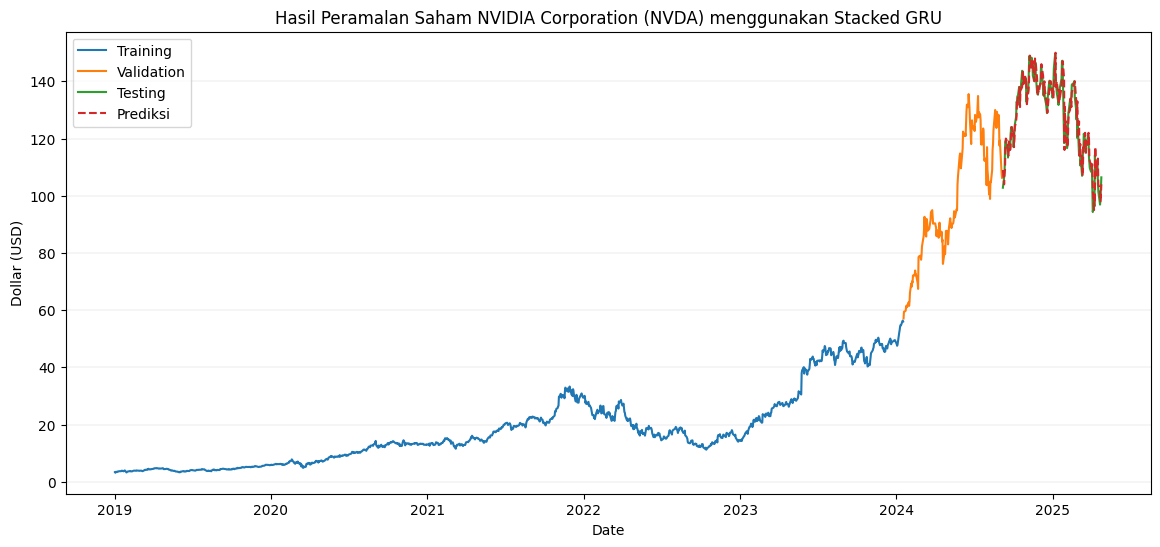

In [ ]:
# Visualisasi Hasil Prediksi Stacked GRU
train = data[:train_len]
valid = data[train_len:(train_len + val_len)]
plt.figure(figsize=(14,6))
plt.title('Hasil Peramalan Saham NVIDIA Corporation (NVDA) menggunakan Stacked GRU')
plt.plot(train['Date'], train['Close'], label='Training')
plt.plot(valid['Date'], valid['Close'], label='Validation')
plt.plot(data_pred_stack_gru['Date'], data_pred_stack_gru['Close'], label='Testing')
plt.plot(data_pred_stack_gru['Date'], data_pred_stack_gru['Prediction_stack_GRU'], label='Prediksi',linestyle='--')
plt.xlabel('Date')
plt.ylabel('Dollar (USD)')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

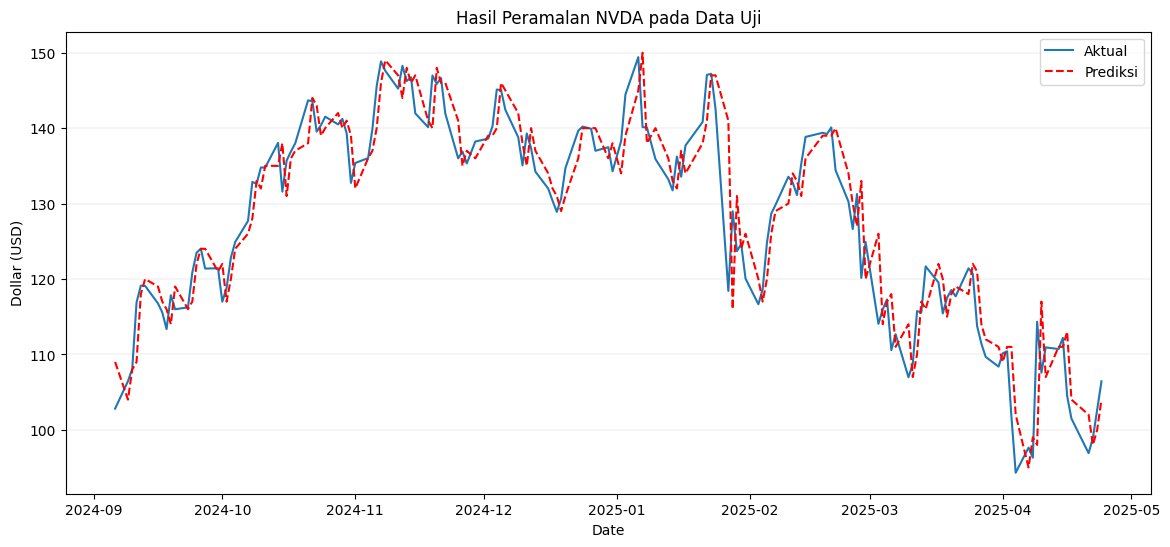

In [ ]:
# Visualisasi Prediksi
plt.figure(figsize=(14,6))
plt.title('Hasil Peramalan NVDA pada Data Uji')
plt.xlabel('Date')
plt.ylabel('Dollar (USD)')
plt.plot(data_pred_stack_gru['Date'], data_pred_stack_gru['Close'], label='Aktual')
plt.plot(data_pred_stack_gru['Date'], data_pred_stack_gru['Prediction_stack_GRU'], label='Prediksi', color='red', linestyle='--')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

In [ ]:
# Ambil 30 hari terakhir sebagai input awal
last_30_stack_gru = data_sc[-30:]
input_pred_stack_gru = last_30_stack_gru.reshape(1, 30, 1)
future_preds_stack_gru = []
for _ in range(30):
    next_pred_stack_gru = model_stack_gru.predict(input_pred_stack_gru, verbose=0)[0][0]
    future_preds_stack_gru.append(next_pred_stack_gru)
# Perbarui jendela input
next_input_stack_gru = np.append(input_pred_stack_gru[0, 1:, 0], next_pred_stack_gru)
input_pred_stack_gru = next_input_stack_gru.reshape(1, 30, 1)

In [ ]:
# Invers transformasi skala
future_preds_inv_stack_gru = sc.inverse_transform(np.array(future_preds_stack_gru).reshape(-1, 1))
future_preds_inv_stack_gru = np.ceil(future_preds_inv_stack_gru)

In [ ]:
# Buat tanggal prediksi (hanya hari kerja)
from datetime import timedelta
last_date_stack_gru = pd.to_datetime(data['Date'].iloc[-1])
future_dates_stack_gru = []
curr_date_stack_gru = last_date_stack_gru + timedelta(days=1)

while len(future_dates_stack_gru) < 30:
    if curr_date_stack_gru.weekday() < 5:  # Hanya hari kerja
        future_dates_stack_gru.append(curr_date_stack_gru)
    curr_date_stack_gru += timedelta(days=1)

In [ ]:
# Buat DataFrame hasil prediksi Stacked GRU
pred_30_stack_gru_df = pd.DataFrame({
'Date': future_dates_stack_gru,
'Prediction_stack_GRU': future_preds_inv_stack_gru.flatten()
})


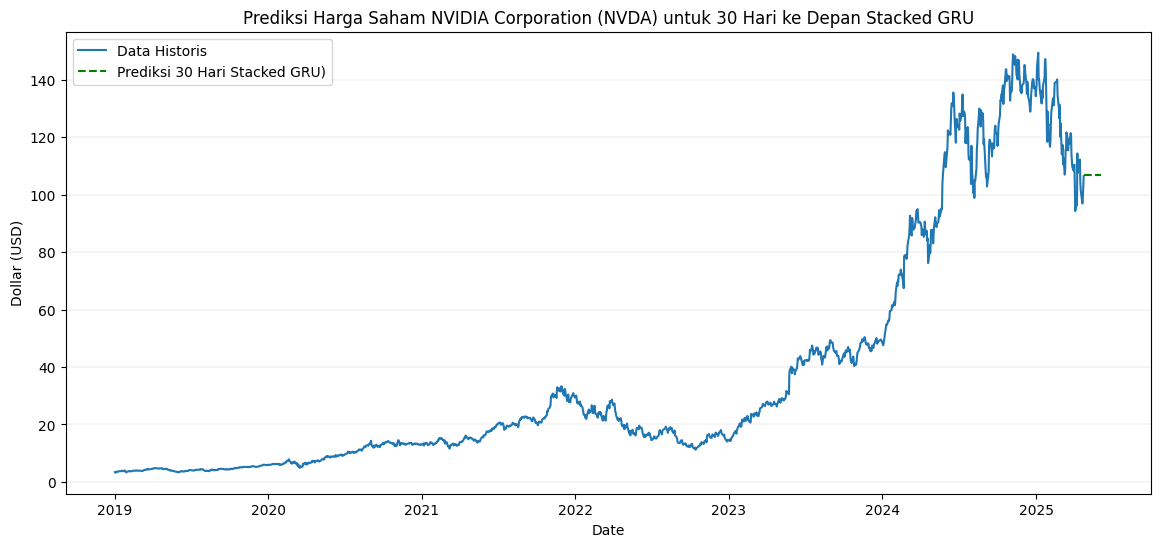

In [ ]:
# Visualisasi hasil prediksi 30 hari ke depan dengan GRU
plt.figure(figsize=(14,6))
plt.title('Prediksi Harga Saham NVIDIA Corporation (NVDA) untuk 30 Hari ke Depan Stacked GRU')
plt.plot(data['Date'], data['Close'], label='Data Historis')
plt.plot(pred_30_stack_gru_df['Date'], pred_30_stack_gru_df['Prediction_stack_GRU'],label='Prediksi 30 Hari Stacked GRU)', linestyle='--', color='green')
plt.xlabel('Date')
plt.ylabel('Dollar (USD)')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

##KESIMPULAN

Berdasarkan hasil evaluasi dari tiga model deep learning berbasis Recurrent Neural Network (RNN), yaitu GRU, Bi-GRU, dan Stacked GRU, diketahui bahwa Stacked GRU menunjukkan performa terbaik dalam melakukan prediksi terhadap data time series yang digunakan. Model ini memiliki nilai Mean Squared Error (MSE) sebesar 20.92, Root Mean Squared Error (RMSE) 0.29, Mean Absolute Error (MAE) 3.35, dan Mean Absolute Percentage Error (MAPE) 2.71%, yang secara konsisten lebih rendah dibandingkan dua model lainnya. Sebagai perbandingan, model GRU memiliki MSE sebesar 23.53 dan Bi-GRU sebesar 25.77, yang menunjukkan bahwa arsitektur penumpukan (stacked) GRU membantu model belajar pola data secara lebih mendalam. Meskipun Bi-GRU dapat menangkap informasi dari dua arah (forward dan backward), kompleksitasnya tidak memberikan hasil yang lebih baik dalam konteks dataset ini. Oleh karena itu, dapat disimpulkan bahwa Stacked GRU merupakan model yang paling efektif dan akurat untuk digunakan pada kasus prediksi ini.